In [3]:
from __future__ import print_function
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#シード値を固定
np.random.seed(1671)

In [5]:
# 定数を定義
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.5

In [6]:
# データ・セットをロードする
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
RESHAPED = 32 * 32 * 3
X_train = X_train.reshape(50000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# 画素値を0-1に変換
X_train /= 255.0
X_test /= 255.0

In [9]:
# クラスラベル（0-9）をone-hotエンコーディング形式に変換
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [10]:
# モデルの定義
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [12]:
# コールバックの設定
earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks = [earlystopping]

In [13]:
hist = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, 
          epochs=NB_EPOCH,
          verbose=VERBOSE, 
          callbacks=callbacks,
          validation_split=VALIDATION_SPLIT)

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 7s 167us/step - loss: 2.0923 - acc: 0.2638 - val_loss: 1.8503 - val_acc: 0.3303
Epoch 2/200
40000/40000 [==============================] - 6s 152us/step - loss: 1.8202 - acc: 0.3447 - val_loss: 1.7166 - val_acc: 0.3855
Epoch 3/200
40000/40000 [==============================] - 6s 142us/step - loss: 1.7417 - acc: 0.3747 - val_loss: 1.7637 - val_acc: 0.3674
Epoch 4/200
40000/40000 [==============================] - 6s 138us/step - loss: 1.7003 - acc: 0.3918 - val_loss: 1.7112 - val_acc: 0.4029
Epoch 5/200
40000/40000 [==============================] - 6s 138us/step - loss: 1.6658 - acc: 0.4018 - val_loss: 1.6671 - val_acc: 0.4161
Epoch 6/200
40000/40000 [==============================] - 6s 138us/step - loss: 1.6305 - acc: 0.4146 - val_loss: 1.6538 - val_acc: 0.4090
Epoch 7/200
40000/40000 [==============================] - 5s 137us/step - loss: 1.6136 - acc: 0.4224 - val_loss: 1.

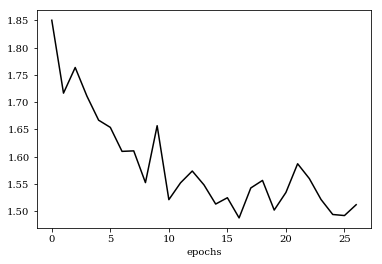

In [14]:
'''
学習の進み具合を可視化
'''
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss,
         label='loss', color='black')
plt.xlabel('epochs')
plt.show()

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 97us/step

Test score: 1.503051810646057
Test accuracy: 0.4708
